In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, classification_report, confusion_matrix

In [2]:
file=r"C:\Users\chira\Desktop\IDS\SensorNetGuard A Dataset for Identifying Malicious Sensor Nodes.csv"
df= pd.read_csv(file)

df.head(5)

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [3]:
def preprocess_timeseries_data(df, timestamp_column):
    """
    Preprocesses the time series data by parsing timestamps, sorting, and setting the index.
    Extracts only day, hour, minute, and second features.
    
    Args:
    df (pd.DataFrame): The dataframe containing the timestamp column.
    timestamp_column (str): The name of the timestamp column to preprocess.
    
    Returns:
    pd.DataFrame: The dataframe with the timestamp column parsed, sorted, and set as the index,
                  with only day, hour, minute, and second features extracted.
    """
    
    # Ensure the timestamp column is in datetime format with the specified format
    df[timestamp_column] = pd.to_datetime(df[timestamp_column], format='%m-%d-%y %H:%M')
    
    # Sort the dataframe by the timestamp column
    df = df.sort_values(by=timestamp_column)
    
    # Set the timestamp column as the index
    df.set_index(timestamp_column, inplace=True)
    
    # Extract only day, hour, minute, and second features
    df['day'] = df.index.day
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['second'] = df.index.second
    
    return df

def ip_to_int(ip):
    """Convert an IPv4 address to an integer."""
    parts = ip.split('.')
    ip_int = (int(parts[0]) << 24) + (int(parts[1]) << 16) + (int(parts[2]) << 8) + int(parts[3])
    return ip_int

In [4]:
df=preprocess_timeseries_data(df,"Timestamp")

df["IP_Address"]=df["IP_Address"].apply(lambda x :ip_to_int(x))

In [5]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [6]:
X = df.drop('Is_Malicious', axis=1)
y = df['Is_Malicious']
# X = df.drop('Timestamp', axis=1)
X.head(5)

,Node_ID,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,Energy_Consumption_Rate,...,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,day,hour,minute,second
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0.0000,0.474839,0.557149,0.889185,0.414509,0.941004,0.318241,0.799840,0.642791,0.257132,...,0.941507,0.398746,0.637313,0.084958,0.424844,0.131058,0.0,0.0,0.000000,0.0
2023-01-02 00:01:00,0.0001,0.882885,0.797457,0.127321,0.873882,0.239220,0.056884,0.714148,0.128127,0.399937,...,0.540533,0.390394,0.123780,0.300326,0.770404,0.735583,0.0,0.0,0.025025,0.0
2023-01-02 00:02:00,0.0002,0.734026,0.052800,0.085223,0.534389,0.069008,0.291497,0.228055,0.333746,0.432738,...,0.896742,0.133092,0.009316,0.787897,0.614411,0.817809,0.0,0.0,0.041542,0.0
2023-01-02 00:03:00,0.0003,0.309344,0.146878,0.473462,0.140407,0.112481,0.215304,0.546011,0.407981,0.093232,...,0.626748,0.017899,0.257606,0.733748,0.902932,0.880012,0.0,0.0,0.058559,0.0
2023-01-02 00:04:00,0.0004,0.918029,0.160557,0.022267,0.980939,0.887481,0.500535,0.816879,0.694722,0.651617,...,0.163758,0.049857,0.057329,0.251544,0.238196,0.082610,0.0,0.0,0.075075,0.0


In [7]:
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [8]:
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train)


In [9]:
from aeon.classification.deep_learning import LITETimeClassifier 
from aeon.classification.deep_learning import TapNetClassifier
from aeon.classification.deep_learning import IndividualInceptionClassifier 


In [10]:
LITE=LITETimeClassifier(batch_size=4,n_epochs=20)

start_time_fit = time.time()
LITE.fit(x_train,y_train)
end_time_fit = time.time()

start_time_predict = time.time()
lite_y_pred=LITE.predict(x_test)
end_time_predict = time.time()

lite_accuracy=accuracy_score(y_test, lite_y_pred)

print(f"Accuracy: {lite_accuracy}")

lite_y_proba = LITE.predict_proba(x_test)[:, 1]







500/500 [==============================] - 3s 4ms/step
Accuracy: 0.9995
500/500 [==============================] - 2s 4ms/step


ROC AUC: 1.0
PR AUC: 0.9999999999999998


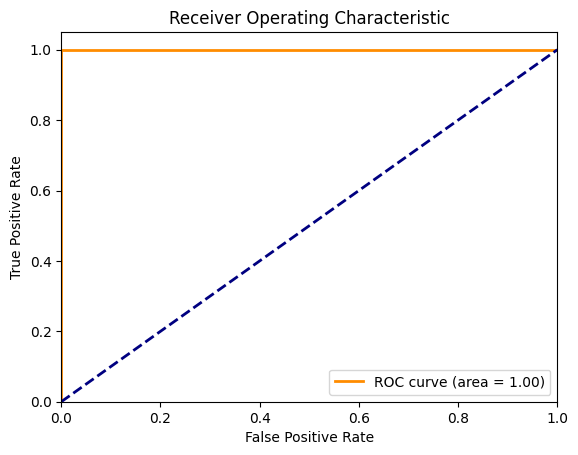

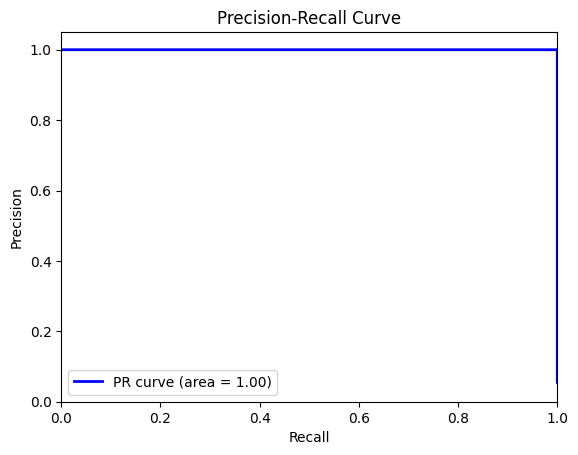

Time taken to fit the model: 1047.55 seconds
Time taken to make predictions: 14.31 seconds


In [11]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, lite_y_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, lite_y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Execution times
fit_time = end_time_fit - start_time_fit
predict_time = end_time_predict - start_time_predict
print(f"Time taken to fit the model: {fit_time:.2f} seconds")
print(f"Time taken to make predictions: {predict_time:.2f} seconds")

In [12]:
lite_accuracy = accuracy_score(y_test, lite_y_pred)
lite_precision = precision_score(y_test, lite_y_pred, average='weighted')
lite_recall = recall_score(y_test, lite_y_pred, average='weighted')
lite_f1 = f1_score(y_test, lite_y_pred, average='weighted')

print(f"Accuracy: {lite_accuracy}")
print(f"Precision: {lite_precision}")
print(f"Recall: {lite_recall}")
print(f"F1 Score: {lite_f1}")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, lite_y_pred))
target_names = ['0', '1']
print("Classification Report:")
print(classification_report(y_test, lite_y_pred, target_names=target_names))

Accuracy: 0.9995
Precision: 0.9995045045045046
Recall: 0.9995
F1 Score: 0.9995010650666519
Confusion Matrix:
[[1889    1]
 [   0  110]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1890
           1       0.99      1.00      1.00       110

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [13]:
tap=TapNetClassifier(batch_size=4,n_epochs=20)

start_time_fit = time.time()
tap.fit(x_train,y_train)
end_time_fit = time.time()

start_time_predict = time.time()
tap_y_pred=tap.predict(x_test)
end_time_predict = time.time()

tap_accuracy=accuracy_score(y_test, tap_y_pred)


print(f"Accuracy: {tap_accuracy}")

tap_y_proba = tap.predict_proba(x_test)[:, 1]


500/500 [==============================] - 6s 10ms/step
Accuracy: 0.9965
500/500 [==============================] - 5s 10ms/step


ROC AUC: 1.0
PR AUC: 1.0


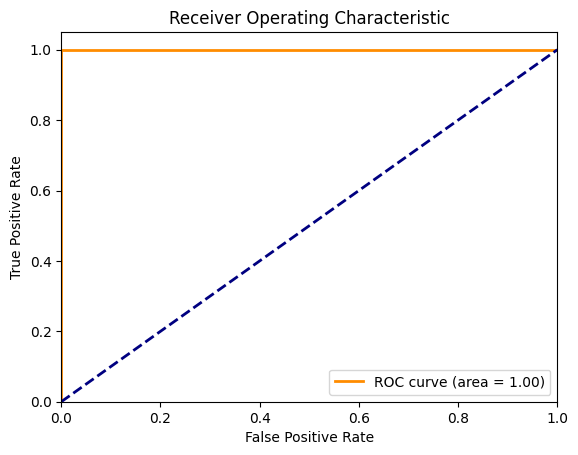

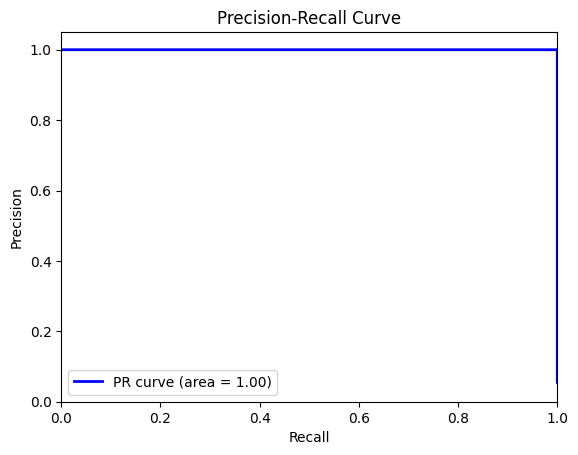

Time taken to fit the model: 1499.54 seconds
Time taken to make predictions: 6.43 seconds


In [14]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, tap_y_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, tap_y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Execution times
fit_time = end_time_fit - start_time_fit
predict_time = end_time_predict - start_time_predict
print(f"Time taken to fit the model: {fit_time:.2f} seconds")
print(f"Time taken to make predictions: {predict_time:.2f} seconds")

In [15]:
tap_accuracy = accuracy_score(y_test, tap_y_pred)
tap_precision = precision_score(y_test, tap_y_pred, average='weighted')
tap_recall = recall_score(y_test, tap_y_pred, average='weighted')
tap_f1 = f1_score(y_test, tap_y_pred, average='weighted')

print(f"Accuracy: {tap_accuracy}")
print(f"Precision: {tap_precision}")
print(f"Recall: {tap_recall}")
print(f"F1 Score: {tap_f1}")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, tap_y_pred))
target_names = ['0', '1']
print("Classification Report:")
print(classification_report(y_test, tap_y_pred, target_names=target_names))

Accuracy: 0.9965
Precision: 0.9967094017094017
Recall: 0.9965
F1 Score: 0.9965507180044624
Confusion Matrix:
[[1883    7]
 [   0  110]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1890
           1       0.94      1.00      0.97       110

    accuracy                           1.00      2000
   macro avg       0.97      1.00      0.98      2000
weighted avg       1.00      1.00      1.00      2000



In [16]:
IND=IndividualInceptionClassifier(batch_size=4,n_epochs=20)

start_time_fit = time.time()
IND.fit(x_train,y_train)
end_time_fit = time.time()

start_time_predict = time.time()
IND_y_pred=IND.predict(x_test)
end_time_predict = time.time()

IND_accuracy=accuracy_score(y_test, IND_y_pred)

print(f"Accuracy: {IND_accuracy}")

IND_y_proba = IND.predict_proba(x_test)[:, 1]





500/500 [==============================] - 4s 6ms/step
Accuracy: 0.9995
500/500 [==============================] - 3s 6ms/step


ROC AUC: 1.0
PR AUC: 1.0


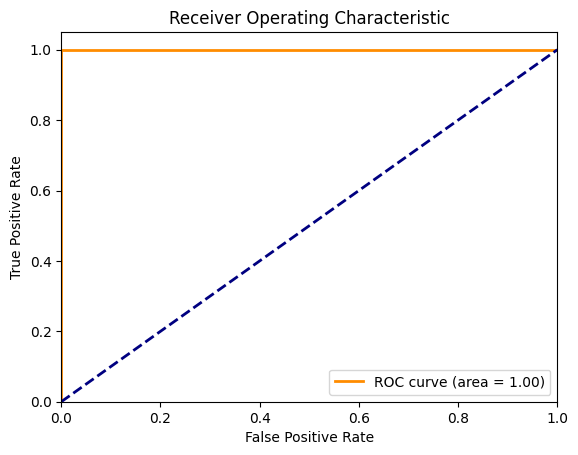

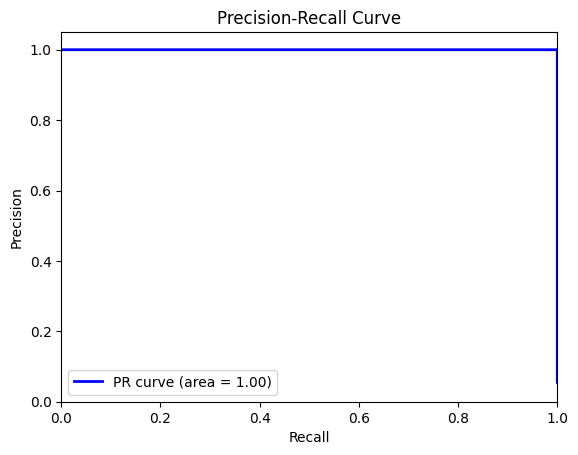

Time taken to fit the model: 720.92 seconds
Time taken to make predictions: 3.93 seconds


In [17]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, IND_y_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, IND_y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Execution times
fit_time = end_time_fit - start_time_fit
predict_time = end_time_predict - start_time_predict
print(f"Time taken to fit the model: {fit_time:.2f} seconds")
print(f"Time taken to make predictions: {predict_time:.2f} seconds")

In [18]:
ind_accuracy = accuracy_score(y_test, IND_y_pred)
ind_precision = precision_score(y_test, IND_y_pred, average='weighted')
ind_recall = recall_score(y_test, IND_y_pred, average='weighted')
ind_f1 = f1_score(y_test, IND_y_pred, average='weighted')

print(f"Accuracy: {ind_accuracy}")
print(f"Precision: {ind_precision}")
print(f"Recall: {ind_recall}")
print(f"F1 Score: {ind_f1}")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, IND_y_pred))
target_names = ['0', '1']
print("Classification Report:")
print(classification_report(y_test, IND_y_pred, target_names=target_names))

Accuracy: 0.9995
Precision: 0.9995045045045046
Recall: 0.9995
F1 Score: 0.9995010650666519
Confusion Matrix:
[[1889    1]
 [   0  110]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1890
           1       0.99      1.00      1.00       110

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

